In [1]:
#Importing the libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df = pd.read_csv('amazon.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
# Converting columns to appropriate data types
df["discounted_price"] = df["discounted_price"].str.replace('₹', '').str.replace(',', '').astype(float)
df["actual_price"] = df["actual_price"].str.replace('₹', '').str.replace(',', '').astype(float)
df["discount_percentage"] = df["discount_percentage"].str.strip("%").astype(float) #/ 100
df["rating"] = df["rating"].str.replace('', '').str.replace('|', "")
df["rating"] = df["rating"].replace('', np.nan).fillna(0).astype(float)
df["rating_count"] = df["rating_count"].str.replace(',', '').fillna(0).astype(float)

/tmp/ipykernel_477/3937149154.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["rating"] = df["rating"].str.replace('', '').str.replace('|', "")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [6]:
df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].mean() #average values of columns containing numerical data

discounted_price        3125.310874
actual_price            5444.990635
discount_percentage       47.691468
rating                     4.093788
rating_count           18270.564505
dtype: float64

In [7]:
df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].max() #maximum values of columns containing numerical data

discounted_price        77990.0
actual_price           139900.0
discount_percentage        94.0
rating                      5.0
rating_count           426973.0
dtype: float64

In [8]:
df[['discounted_price','actual_price','discount_percentage','rating','rating_count']].min() #minimum values of columns containing numerical data

discounted_price       39.0
actual_price           39.0
discount_percentage     0.0
rating                  0.0
rating_count            0.0
dtype: float64

## Creating 5 Histograms from the following columns (containing numerical data) - 
1. discounted_price column
2. actual_price column
3. discount_percentage column
4. rating column
5. rating_count column

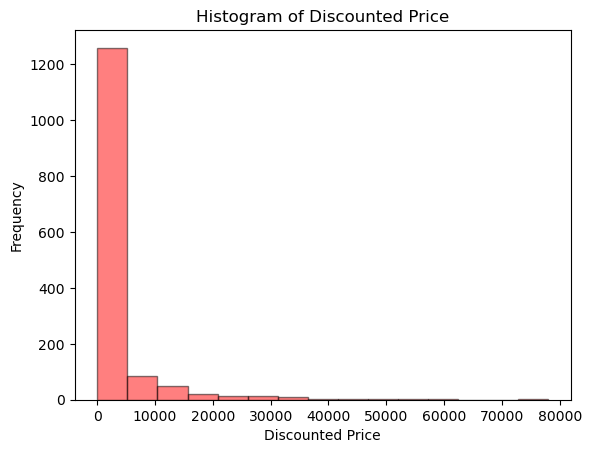

In [9]:
#Plotting the Histogram for discounted_prices 
plt.hist(df['discounted_price'], bins=15, color='r', edgecolor='black', alpha=0.5)
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.title('Histogram of Discounted Price')
plt.show()

### Inference from histogram of Discounted Price

Since the discounted price histogram has a right-sided skewness, it means that the majority of the data values are clustered towards the lower end of the x-axis (i.e., lower discounted prices), with fewer data points having higher discounted prices. In other words, the tail of the histogram is longer on the right side compared to the left side. This suggests that there are few products with high discounted prices, but there are a large number of products with low discounted prices.

In the context of sales or marketing, a right-skewed histogram for discounted prices may indicate that the company is using discounts to incentivize customers to purchase products that might not otherwise sell as well. The company may be using these discounts strategically to attract price-sensitive customers and move inventory.

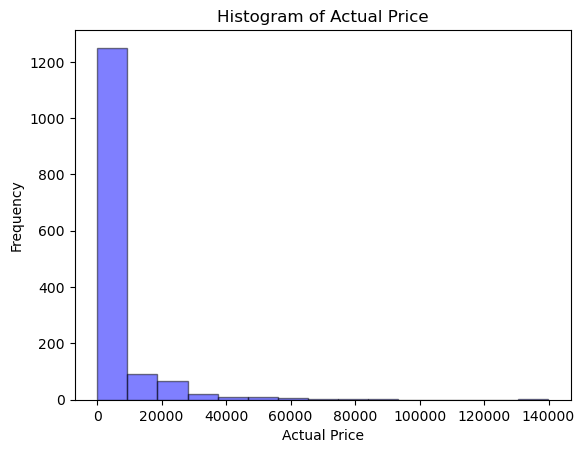

In [10]:
#Plotting the Histogram for actual_prices 
plt.hist(df['actual_price'], bins=15, color='b', edgecolor='black', alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Price')
plt.show()

### Inference from Histogram of Actual Prices 

Since the actual price histogram has a right-sided skewness, it means that the majority of the data is concentrated on the left side of the histogram and there are few data points on the right side. In other words, there are more items with lower actual prices and relatively fewer items with higher actual prices. This could indicate that the products are generally priced lower or that there are more discounts on lower-priced items. It could also suggest that there is less demand for higher-priced items, leading to fewer sales and therefore fewer data points in that range.

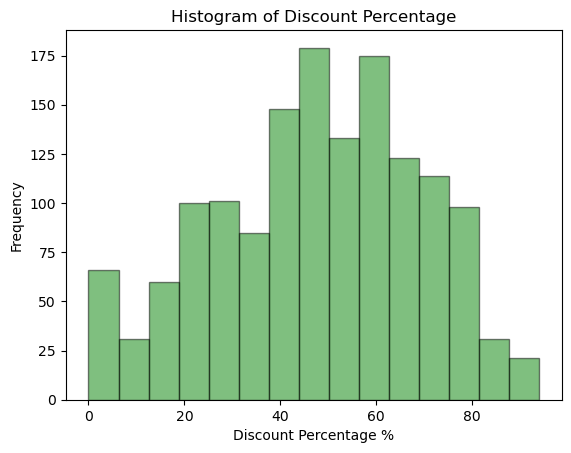

In [11]:
#Plotting the Histogram for discount_percentage 
plt.hist(df['discount_percentage'], bins=15, color='g', edgecolor='black', alpha=0.5)
plt.xlabel('Discount Percentage %')
plt.ylabel('Frequency')
plt.title('Histogram of Discount Percentage')
plt.show()

### Inference from Histogram of Discount Percentage 

If the discount_percentage histogram has nearly zero skewedness, it would mean that the data is symmetrically distributed around the mean. This indicates that there is a balance between the number of discounts and the size of discounts. It could mean that the company is offering discounts consistently across products and categories, without any bias towards certain items or categories. This information can be useful for sales and marketing teams in determining the effectiveness of their discounting strategies and making data-driven decisions for future promotions.

### Final Inference from the above Three Histograms

A common inference from these three inferences is that discounts play a significant role in the sales and marketing strategies of the company. The right-skewed histograms for discounted price and actual price indicate that the company is using discounts to incentivize customers to purchase products that might not otherwise sell as well, attract price-sensitive customers, and move inventory. On the other hand, the nearly zero-skewed histogram for discount percentage suggests that company is offering discounts consistently across products and categories, without any bias towards certain items or categories. Overall, the company's discounting strategies can be an effective tool for driving sales and revenue.

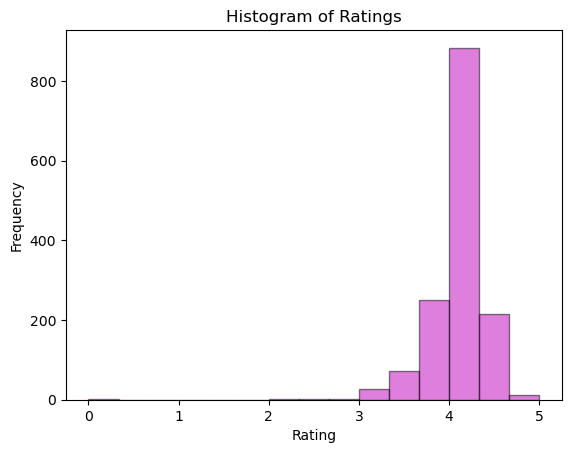

In [12]:
#Plotting the Histogram of Ratings 
plt.hist(df['rating'], bins=15, color='m', edgecolor='black', alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

### Inference from Histogram of Ratings 

If the rating histogram has a left-sided skewness, it means that the majority of the data values are clustered towards the higher end of the x-axis (i.e., higher ratings), with fewer data points having lower ratings. In other words, the tail of the histogram is longer on the left side compared to the right side. This suggests that there are few products with low ratings, but there are a large number of products with high ratings.

In the context of sales or marketing, a left-skewed histogram for ratings may indicate that the company's products are generally well-received by customers, with a large proportion of products receiving high ratings. This can be a positive signal for the company, indicating that customers are satisfied with the quality of the products and the company's overall performance. It can also be used by the company to identify areas for improvement, by analyzing the few products that receive lower ratings and taking steps to address customer complaints or improve product features.

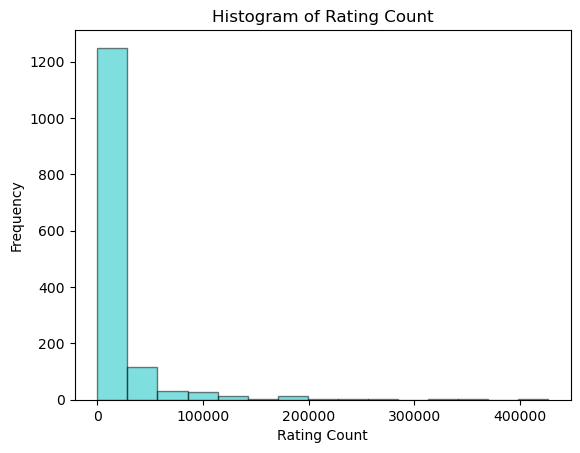

In [13]:
#Plotting the Histogram of Rating Count 
plt.hist(df['rating_count'], bins=15, color='c', edgecolor='black', alpha=0.5)
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.title('Histogram of Rating Count')
plt.show()

### Inference from Histogram of Rating Count

If the rating count histogram has a right-sided skewness on a scale of 0-400000, it means that the majority of products have low number of ratings, with few products having a large number of ratings. In other words, the tail of the histogram is longer on the right side compared to the left side, indicating that there are a large number of products with low rating counts, and relatively few products with high rating counts.
In the context of sales or marketing, a right-skewed histogram for rating count could mean that the company has a large number of products that are not as popular or have not been on the market for very long, and therefore have not accumulated many ratings. It could also mean that the company has a wide range of products with varying popularity, with some products being very popular and others not as much. This information can be useful for sales and marketing teams in determining which products may need more promotion or which products are selling well without much marketing effort.

### Final Inference from the above Two Histograms
The company has a left-skewed histogram for ratings, indicating that the majority of their products have high ratings, this can be a positive signal for the company. It suggests that customers are generally satisfied with the quality of the products and the company's overall performance. However, since the company also has a right-skewed histogram for rating count, indicating that many products have low rating counts, this could mean that the company has a large number of products that are not as popular or have not been on the market for very long. The company may need to consider promoting these products more effectively to increase their visibility and improve their rating count.

### Creating 3 Word Clouds for the following Columns (which contains text values) - 
1. about_product column
2. review_title column
3. review_content column

### Use of Word Cloud for Amazon Dataset

A word cloud visualization is a graphical representation of text data that displays the most frequently occurring words in a given text as larger and bolder in the image. The more often a specific word appears in the source text, the bigger and more prominent it will appear in the visualization. Word clouds are commonly used to visually represent the most important topics or themes in a piece of text data, and can be used to quickly identify key ideas, trends or patterns in large datasets. They are often used in areas such as marketing research, social media analysis, and content analysis, among others.

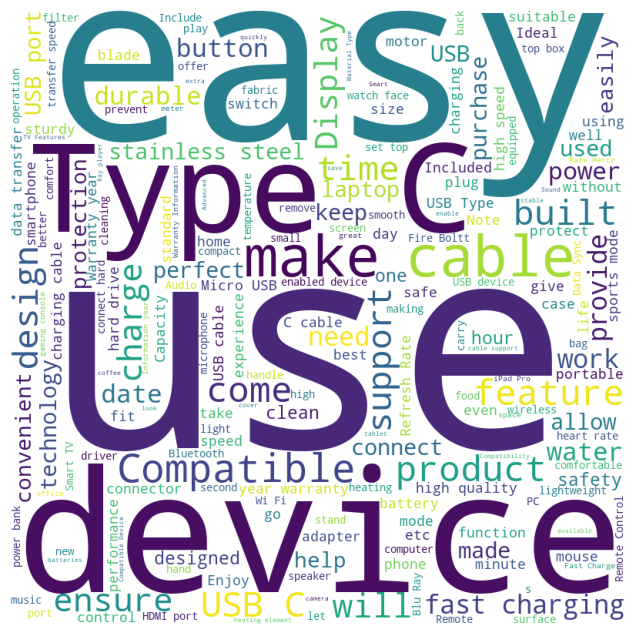

In [14]:
# Create a string of all the about_product values
about_product_str = ' '.join(df['about_product'].values)

# Generate the word cloud for about_product
about_product_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(about_product_str)

# Plot the word cloud for about_product
plt.figure(figsize=(8,8))
plt.imshow(about_product_wordcloud)
plt.axis('off')
plt.show()

### Inference from Word Cloud of column 'about_product'

The "about_product" word cloud is generated from product descriptions. A word cloud generated from product descriptions can provide insight into the most commonly used words and phrases in those descriptions. This can give an idea of the key features or attributes of the products being sold, as well as any frequently used marketing or promotional language. By examining the word cloud, one can quickly identify the most prominent and frequently occurring terms, which can be useful for understanding customer preferences and for developing targeted marketing strategies. Additionally, word clouds can also help identify any outliers or unusual terms that may require further investigation or analysis.


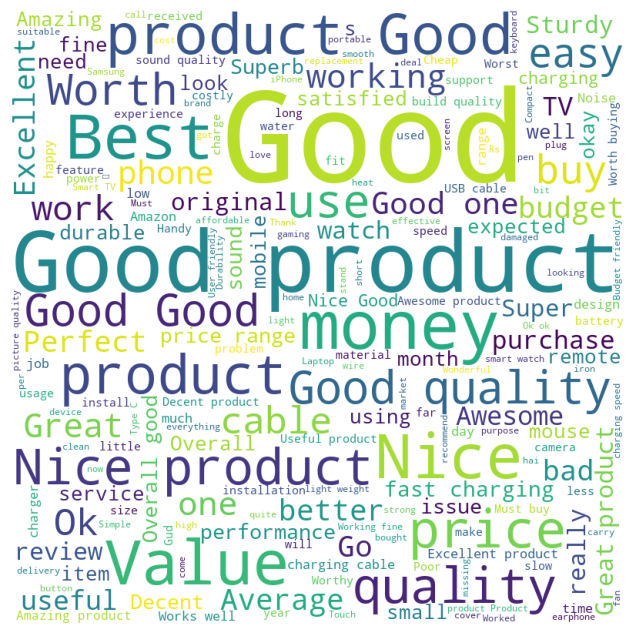

In [15]:
# Create a string of all the review_title values
review_title_str = ' '.join(df['review_title'].values)

# Generate the word cloud for about_product
review_title_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(review_title_str)

# Plot the word cloud for about_product
plt.figure(figsize=(8,8))
plt.imshow(review_title_wordcloud)
plt.axis('off')
plt.show()

### Inference from Word Cloud of column 'review_title'

A review_title word cloud visualization generated from user reviews provides a visual representation of the most frequently used words or phrases in the review titles. This can give an idea of the main topics or themes that customers are mentioning in their reviews. For example, the word "good" appears frequently in the review_title word cloud visualization, it could indicate that customers generally have positive opinions of the product. However, it is important to look at the context in which the word is used, as "good" can have different connotations depending on the product and the customer's expectations. Similarly, words like "value," and "worth" are prominent, it may indicate that customers are evaluating the product based on its price. Overall, the review_title word cloud can be used as a tool to identify the most relevant topics that customers are talking about and provide insights for improving the product or addressing customer concerns.





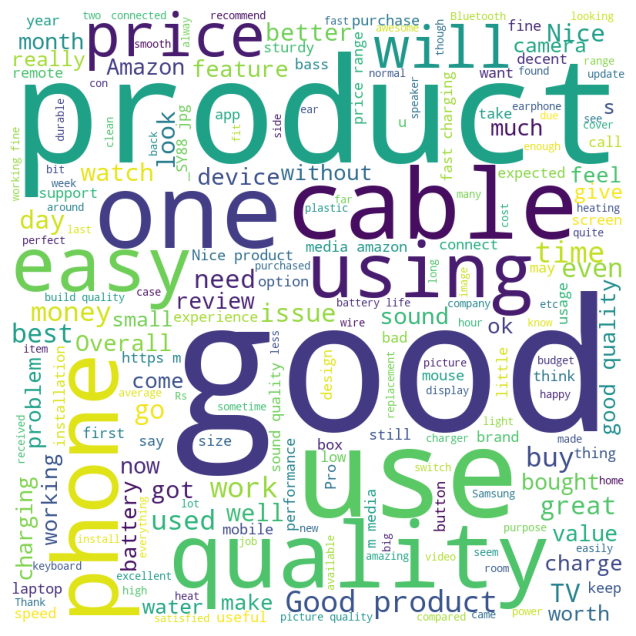

In [16]:
# Create a string of all the review_content values
review_content_str = ' '.join(df['review_content'].values)

# Generate the word cloud for review_content
review_content_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(review_content_str)

# Plot the word cloud for review_content
plt.figure(figsize=(8,8))
plt.imshow(review_content_wordcloud)
plt.axis('off')
plt.show()

### Inference from Word Cloud of column 'review_content'

A review_content word cloud generated from user reviews can provide insights into the common themes or topics that customers mention when discussing the product. Since words like "good," "easy," "use," and "quality" appear frequently in the review_content word cloud, it could indicate that customers generally have positive opinions about the products being reviewed. These words suggest that customers find the products easy to use and of good quality, which could lead to higher overall ratings and increased sales. However, it's important to also consider the context in which these words are being used - for example, "easy" could be a positive attribute for a household appliance, but may not be as relevant for a piece of software. Additionally, it's possible that these words are being used in a negative context (e.g. "the product was not easy to use"), so it's important to analyze the reviews themselves to get a complete picture of customer sentiment.

### Sub-Categorizing the 'category' Column to get an insight of various types of subcategories of products that are being sold or offered by a company - Amazon

In [17]:
# Split the values in the category column by the "|" separator and create a new column with the first value
df['Sub-category'] = df['category'].str.split('|').str[0]
# Count the number of occurrences of each subcategory
counts = df['Sub-category'].value_counts()
# Print the results
print(counts)

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: Sub-category, dtype: int64


### From the given subcategories and their counts, we can make the following inferences:

Electronics, Computers & Accessories, and Home & Kitchen are the most popular categories among customers. These categories likely have a wide range of products and may be the main focus of the business.
Office products, Home Improvement, Toys & Games, Car & Motorbike, and Health & Personal Care have relatively low counts. These categories may not be as popular among customers, or the business may not have as many products in these categories.
The small count for Musical Instruments may indicate that the business does not specialize in or focus heavily on this category.
Overall, these subcategory counts can provide insight into which categories the business is most successful in and which may require more attention or promotion.

### Creating graphs for finding out relationship between Sub-categories and other columns -

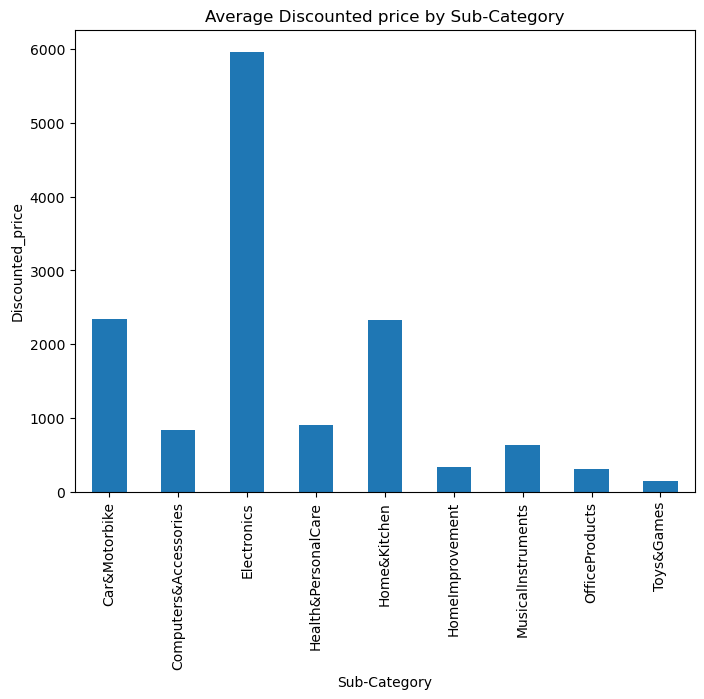

In [18]:
# Group data by sub-category and average discounted_price
subcat_data4 = df.groupby('Sub-category')['discounted_price'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
subcat_data4.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Discounted_price')
ax.set_title('Average Discounted price by Sub-Category')

plt.show()

The maximum average discounted price is for Electronics sub-category, least is for Toys&Games sub-category.

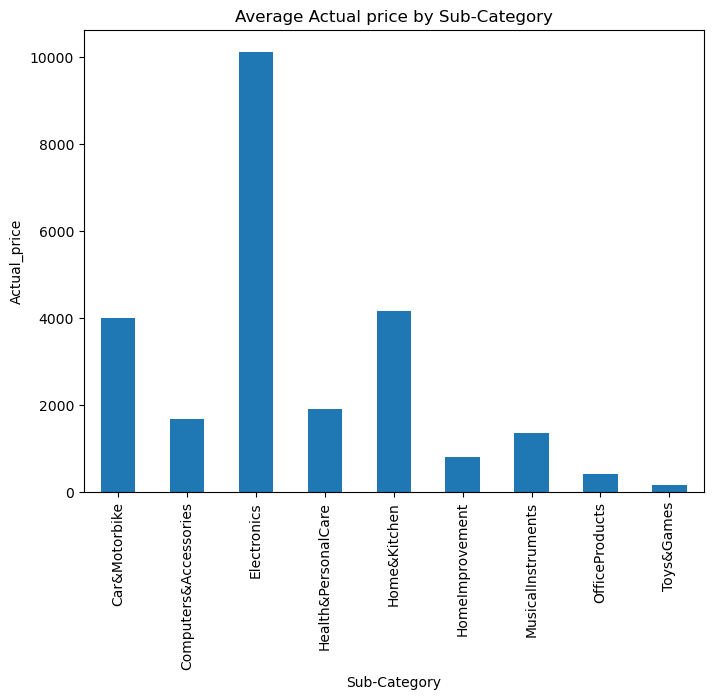

In [19]:
# Group data by sub-category and Average actual_price
subcat_data5 = df.groupby('Sub-category')['actual_price'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
subcat_data5.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Actual_price')
ax.set_title('Average Actual price by Sub-Category')

plt.show()

The maximum average actual price is for Electronics sub-category, least is for Toys&Games sub-category.

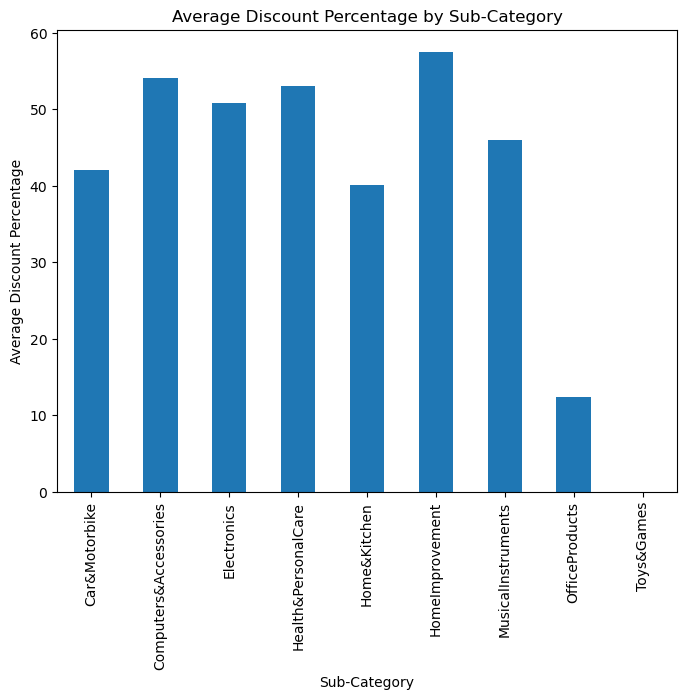

In [20]:
# Group data by sub-category
subcat_data = df.groupby('Sub-category')['discount_percentage'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
subcat_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Average Discount Percentage')
ax.set_title('Average Discount Percentage by Sub-Category')

plt.show()

The maximum average discount percentage is for HomeImprovements sub-category, closely followed by Computers&Accessories, least discount percentage is for Toys&Games.

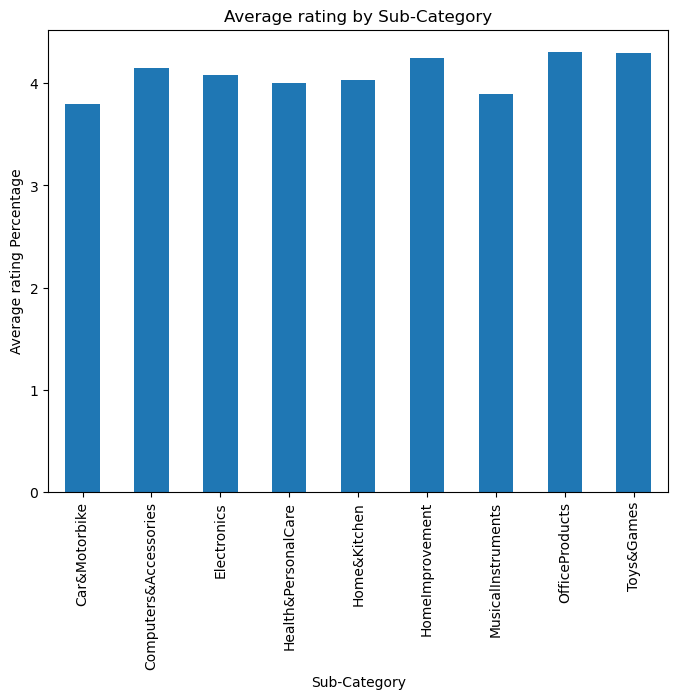

In [21]:
# Group data by sub-category and Average ratings %
subcat_data2 = df.groupby('Sub-category')['rating'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
subcat_data2.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Average rating Percentage')
ax.set_title('Average rating by Sub-Category')

plt.show()

The average rating is more or less the same for all sub-categories, all products receiving good ratings on the average.

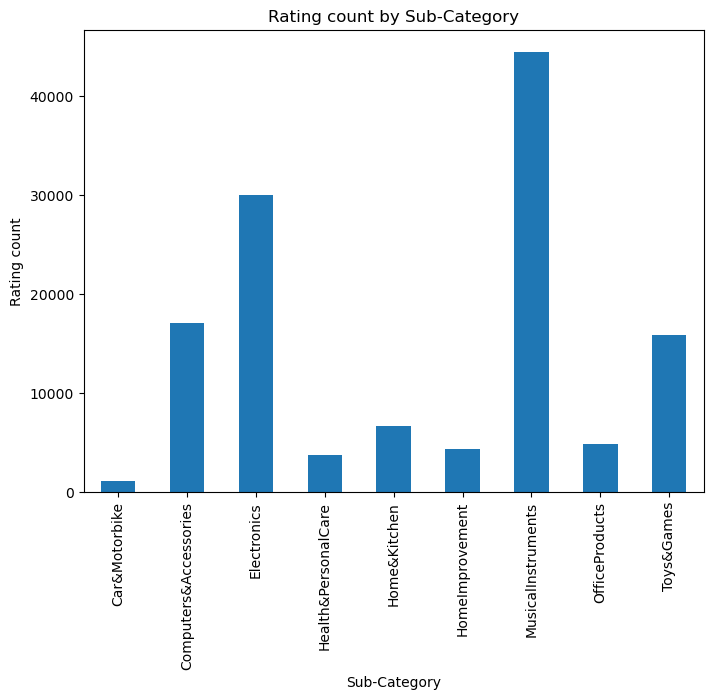

In [22]:
# Group data by sub-category and Average ratings count
subcat_data3 = df.groupby('Sub-category')['rating_count'].mean()

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
subcat_data3.plot(kind='bar', ax=ax)
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Rating count')
ax.set_title('Rating count by Sub-Category')

plt.show()

The rating count is maximum for MusicalInstruments sub-category, followed by Electronics, the least is for Car&Motorbike.